Coisas pra fazer em ordem de importância:
1.   tuning de hyperparametros
2.   fazer rede neural
3.   testar os outros modelos ainda não testados com SMOTE
4.   tuning de hyperparametros + SMOTE
5.   fazer emsembles
6.   fazer o video


Coisas que podemos fazer se der tempo e tiver paciência (provavelmente não vamos fazer pq da muito trabalho, então a gente fala sobre esses na parte "o que poderia ser feito melhor ou diferente" do video):
1.   feature selection
2.   feature engineering
3.   exploratory data analysis robusto

#Importing libraries and analysis

In [1]:
# Importing libraries
import warnings
warnings.filterwarnings('ignore')

import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
!pip install scikit-plot
import scikitplot as skplt

#modelos
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

#metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

#cross_validation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold, cross_validate

#emsembles
from sklearn.ensemble import StackingClassifier

#balancing
!pip install imbalanced-learn
!pip install imblearn
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from collections import Counter


%matplotlib inline

0.8.1


In [2]:
bank_data = pd.read_csv('data.csv')
bank_data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,..

In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
bank_data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672,0.228813,0.323482,1.328641e+06,0.109091,0.184361,0.022408,0.847980,0.689146,0.689150,0.217639,5.508097e+09,1.566212e+06,0.264248,0.379677,4.032850e+05,8.376595e+06,0.630991,4.416337e+06,0.113177,0.886823,0.008783,...,0.522273,0.124095,3.592902e+06,3.715999e+07,0.090673,0.353828,0.277395,5.580680e+07,0.761599,0.735817,0.331410,5.416004e+07,0.934733,0.002549,0.029184,1.195856e+09,2.163735e+09,0.594006,2.471977e+09,0.671531,1.220121e+06,0.761599,0.331410,0.115645,0.649731,0.461849,0.593415,0.315582,0.031506,0.001173,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686

In [5]:
# Checking for duplicates
bank_data.duplicated().sum()

0

In [6]:
print(bank_data['Bankrupt?'].value_counts())

0    6599
1     220
Name: Bankrupt?, dtype: int64


In [7]:
#matriz de correlação (é bem grande, recomendo n rodar)
#fig, ax = plt.subplots(figsize=(75,75))

#sns.heatmap(bank_data.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True)

#Separação treino/teste

In [8]:
x = bank_data.drop('Bankrupt?', axis=1)
y = bank_data['Bankrupt?']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#LogisticRegression

In [10]:
lr = LogisticRegression(random_state=0, max_iter = 100000)

lr.fit(x_train,y_train)
lr_pred_class = lr.predict(x_test)

print(classification_report(y_test, lr_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.95      1364
   macro avg       0.48      0.49      0.49      1364
weighted avg       0.93      0.95      0.94      1364



Text(0, 0.5, 'True Positive Rate')

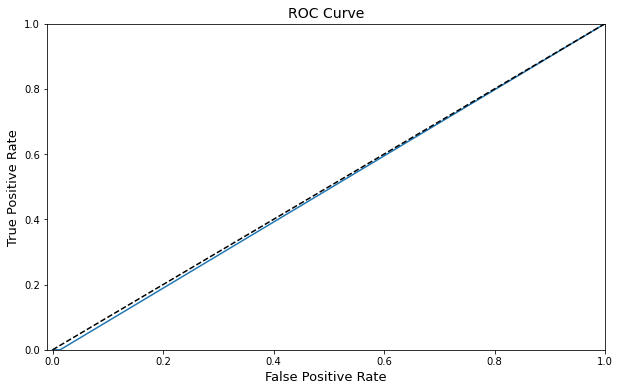

In [11]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, lr_pred_class)

plt.figure(figsize=(10,6))
plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, lr_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

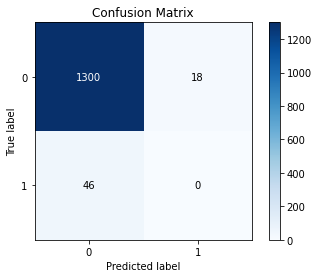

In [12]:
plot = skplt.metrics.plot_confusion_matrix(y_test, lr_pred_class)

#LinearDiscriminantAnalysis

In [13]:
ld = LinearDiscriminantAnalysis()

ld.fit(x_train,y_train)
ld_pred_class = ld.predict(x_test)

print(classification_report(y_test, ld_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1318
           1       0.53      0.35      0.42        46

    accuracy                           0.97      1364
   macro avg       0.76      0.67      0.70      1364
weighted avg       0.96      0.97      0.96      1364



Text(0, 0.5, 'True Positive Rate')

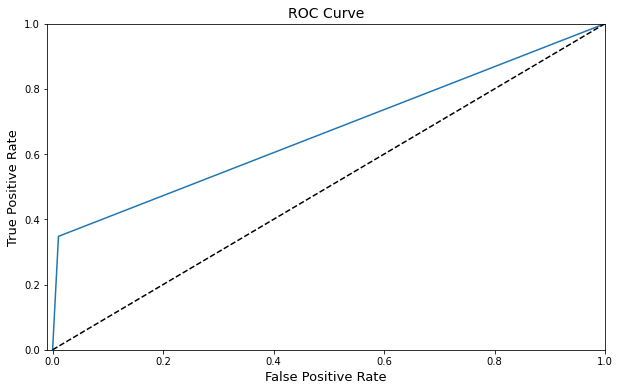

In [14]:
ld_fpr, ld_tpr, ld_thresold = roc_curve(y_test, ld_pred_class)

plt.figure(figsize=(10,6))
plt.plot(ld_fpr, ld_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, ld_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

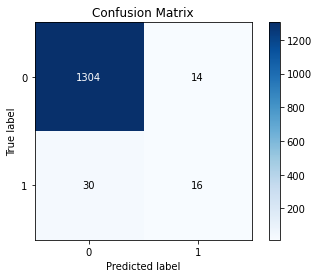

In [15]:
plot = skplt.metrics.plot_confusion_matrix(y_test, ld_pred_class)

#XGBoost

In [16]:
xgb = XGBClassifier()

xgb.fit(x_train,y_train)
xgb_pred_class = xgb.predict(x_test)

print(classification_report(y_test, xgb_pred_class))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1318
           1       0.72      0.28      0.41        46

    accuracy                           0.97      1364
   macro avg       0.85      0.64      0.70      1364
weighted avg       0.97      0.97      0.97      1364



Text(0, 0.5, 'True Positive Rate')

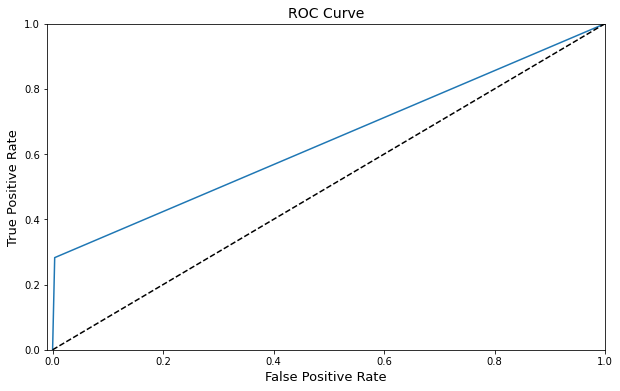

In [17]:
xgb_fpr, xgb_tpr, xgb_thresold = roc_curve(y_test, xgb_pred_class)

plt.figure(figsize=(10,6))
plt.plot(xgb_fpr, xgb_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, xgb_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

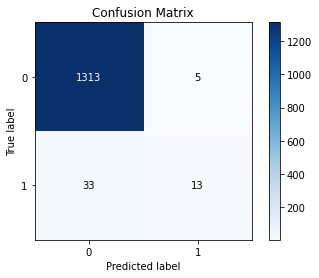

In [18]:
plot = skplt.metrics.plot_confusion_matrix(y_test, xgb_pred_class)

#SVM

In [19]:
svc = SVC(kernel = 'rbf')

svc.fit(x_train,y_train)
svc_pred_class = svc.predict(x_test)

print(classification_report(y_test, svc_pred_class))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.97      0.95      1364



Text(0, 0.5, 'True Positive Rate')

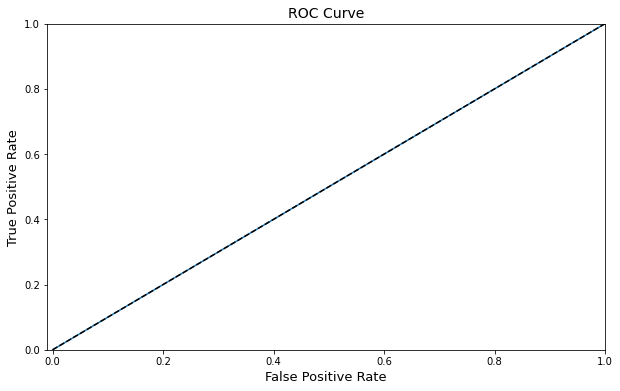

In [20]:
svc_fpr, svc_tpr, svc_thresold = roc_curve(y_test, svc_pred_class)

plt.figure(figsize=(10,6))
plt.plot(svc_fpr, svc_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

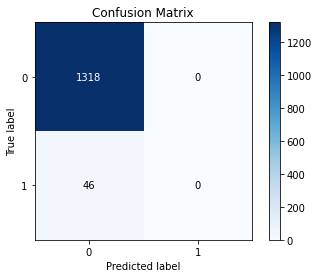

In [21]:
plot = skplt.metrics.plot_confusion_matrix(y_test, svc_pred_class)

#Random Forest

In [22]:
rf = RandomForestClassifier()

rf.fit(x_train, y_train)
rf_pred_class = rf.predict(x_test)

print(classification_report(y_test, rf_pred_class))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1318
           1       0.57      0.17      0.27        46

    accuracy                           0.97      1364
   macro avg       0.77      0.58      0.63      1364
weighted avg       0.96      0.97      0.96      1364



Text(0, 0.5, 'True Positive Rate')

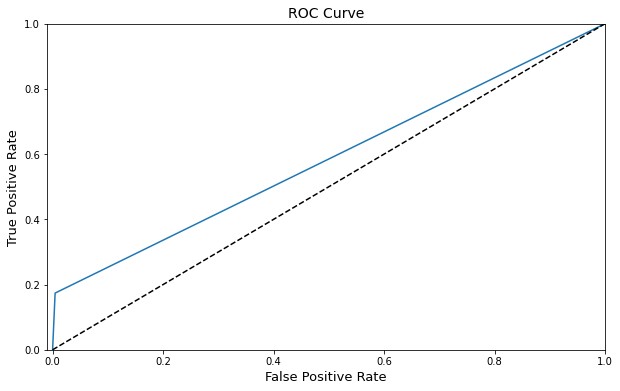

In [23]:
rf_fpr, rf_tpr, rf_thresold = roc_curve(y_test, rf_pred_class)

plt.figure(figsize=(10,6))
plt.plot(rf_fpr, rf_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, rf_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

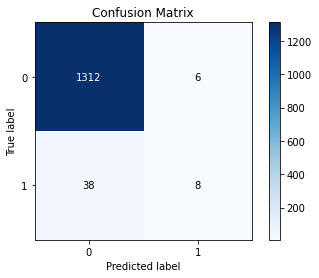

In [24]:
plot = skplt.metrics.plot_confusion_matrix(y_test, rf_pred_class)

#KNN

In [25]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(x_train, y_train)
knn_pred_class = knn.predict(x_test)

print(classification_report(y_test, knn_pred_class))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.97      0.95      1364



Text(0, 0.5, 'True Positive Rate')

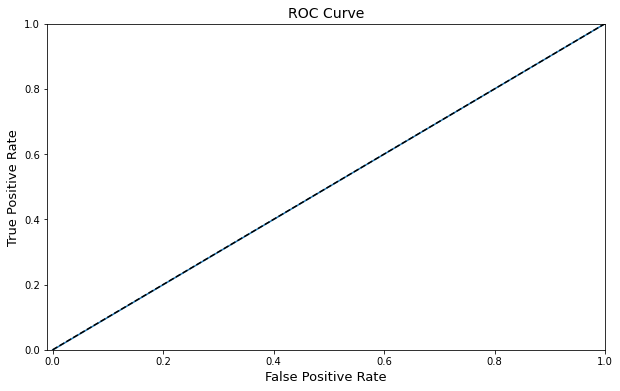

In [26]:
knn_fpr, knn_tpr, knn_thresold = roc_curve(y_test, knn_pred_class)

plt.figure(figsize=(10,6))
plt.plot(knn_fpr, knn_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knn_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

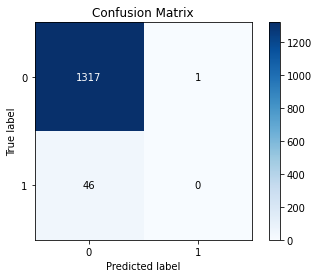

In [27]:
plot = skplt.metrics.plot_confusion_matrix(y_test, knn_pred_class)

#Neural Network

In [28]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)
mlp.fit(x_train, y_train)

mlp.fit(x_train, y_train)
mlp_pred_class = mlp.predict(x_test)

print(classification_report(y_test, mlp_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.94      1364
   macro avg       0.48      0.49      0.48      1364
weighted avg       0.93      0.94      0.94      1364



Text(0, 0.5, 'True Positive Rate')

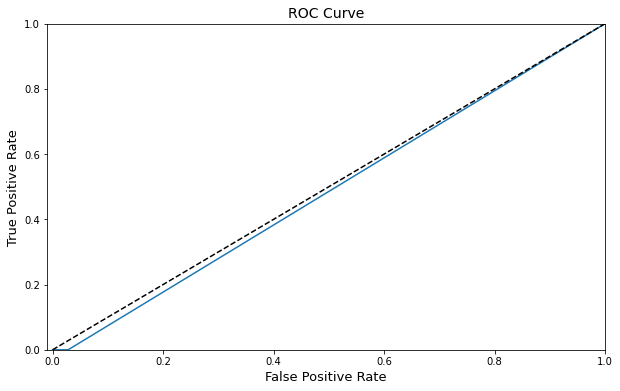

In [29]:
mlp_fpr, mlp_tpr, mlp_thresold = roc_curve(y_test, mlp_pred_class)

plt.figure(figsize=(10,6))
plt.plot(mlp_fpr, mlp_tpr, label='MLP Classifier Score: {:.4f}'.format(roc_auc_score(y_test, mlp_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

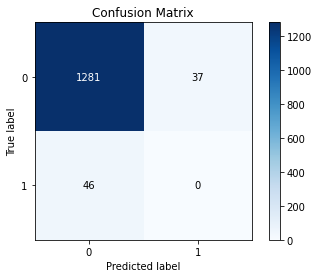

In [30]:
plot = skplt.metrics.plot_confusion_matrix(y_test, mlp_pred_class)

#Hyperparamter tuning with sherpa

In [31]:
!pip install parameter-sherpa
import sherpa
import sherpa.algorithms.bayesian_optimization as bayesian_optimization

In [32]:
#example
#parameters = [sherpa.Discrete('n_neighbors', [3, 15]),,
#              sherpa.Choice('algorithm', ['gini', 'entropy']),
#              sherpa.Continuous('max_features', [0.1, 0.9])]
#
#algorithm = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [33]:
parameters = [sherpa.Discrete('n_neighbors', [3, 15]),
              sherpa.Discrete('leaf_size', [20, 50]),
              sherpa.Choice('algorithm', ['ball_tree', 'kd_tree', 'brute'])]

algorithm = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [34]:
#study = sherpa.Study(parameters=parameters,
#                     algorithm=algorithm,
#                     lower_is_better=False)
#
#for trial in study:
#    print("Trial ", trial.id, " with parameters ", trial.parameters)
#    knn = KNeighborsClassifier(n_neighbors=trial.parameters['n_neighbors'],
#                                 leaf_size=trial.parameters['leaf_size'],
#                                 algorithm=trial.parameters['algorithm'])
#    knn.fit(x_train, y_train)
#    knn_pred_class = knn.predict(x_test)
#
#    knn_f1 = f1_score(y_test, knn_pred_class)
#
#    print("F1 score: ", knn_f1)
#    study.add_observation(trial, iteration=1, objective=knn_f1)
#    study.finalize(trial)
#print(study.get_best_result())




#Balancing data: Oversampling with SMOTE

In [35]:
oversample = SMOTE()
x_oversampled, y_oversampled = oversample.fit_resample(x, y)
x_train_oversampled, x_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(x_oversampled, y_oversampled, test_size = 0.2, random_state = 0)

print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_oversampled))

Original dataset shape Counter({0: 6599, 1: 220})
Resampled dataset shape Counter({1: 6599, 0: 6599})


#LogisticRegression oversampled

In [36]:
lr_oversampled = LogisticRegression(random_state=0, max_iter = 100000)

lr_oversampled.fit(x_train_oversampled,y_train_oversampled)
lr_oversampled_pred_class = lr_oversampled.predict(x_test_oversampled)
lr_oversampled_pred_class_original = lr_oversampled.predict(x_test)

print(classification_report(y_test_oversampled, lr_oversampled_pred_class))
print(classification_report(y_test, lr_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       0.56      0.77      0.65      1269
           1       0.68      0.45      0.54      1371

    accuracy                           0.60      2640
   macro avg       0.62      0.61      0.60      2640
weighted avg       0.62      0.60      0.59      2640

              precision    recall  f1-score   support

           0       0.97      0.76      0.85      1318
           1       0.06      0.43      0.10        46

    accuracy                           0.74      1364
   macro avg       0.52      0.60      0.48      1364
weighted avg       0.94      0.74      0.83      1364



Text(0, 0.5, 'True Positive Rate')

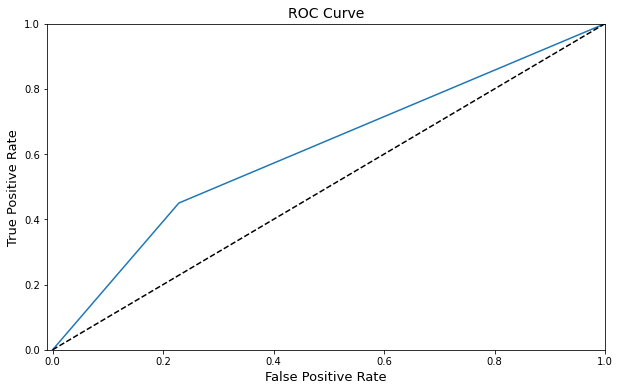

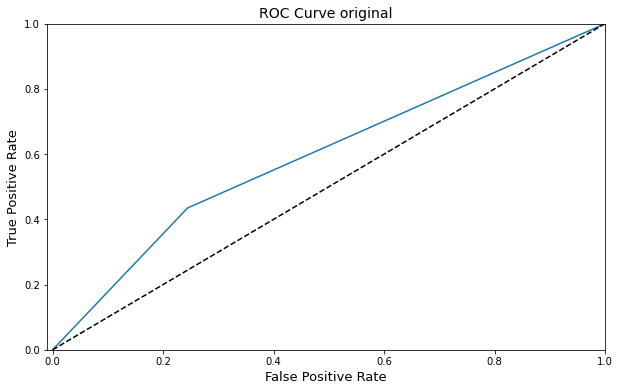

In [37]:
log_oversampled_fpr, log_oversampled_tpr, log_oversampled_thresold = roc_curve(y_test_oversampled, lr_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(log_oversampled_fpr, log_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, lr_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)



log_oversampled_fpr, log_oversampled_tpr, log_oversampled_thresold = roc_curve(y_test, lr_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(log_oversampled_fpr, log_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, lr_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve original', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

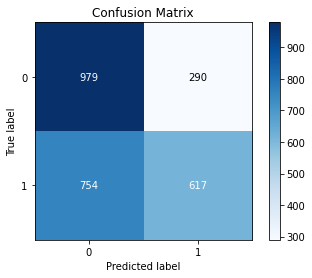

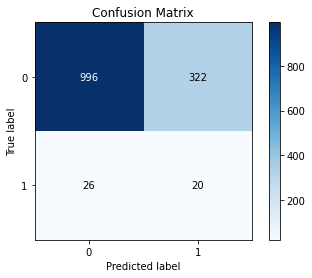

In [38]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, lr_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_test, lr_oversampled_pred_class_original)

#LinearDiscriminantAnalysis oversampled (melhor até o momento)

In [39]:
ld_oversampled = LinearDiscriminantAnalysis()

ld_oversampled.fit(x_train_oversampled,y_train_oversampled)
ld_oversampled_pred_class = ld_oversampled.predict(x_test_oversampled)
ld_oversampled_pred_class_original = ld_oversampled.predict(x_test)

print(classification_report(y_test_oversampled, ld_oversampled_pred_class))
print(classification_report(y_test, ld_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1269
           1       0.89      0.92      0.90      1371

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1318
           1       0.22      0.85      0.35        46

    accuracy                           0.89      1364
   macro avg       0.61      0.87      0.64      1364
weighted avg       0.97      0.89      0.92      1364



Text(0, 0.5, 'True Positive Rate')

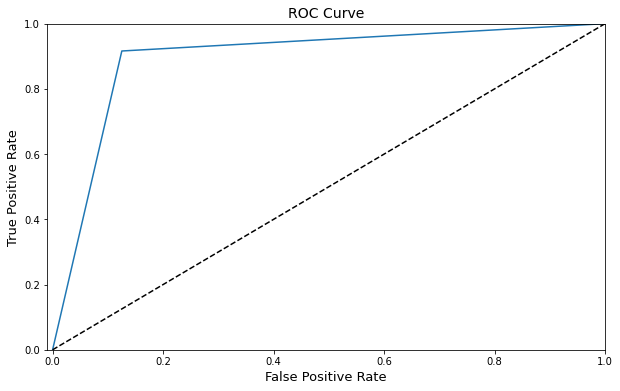

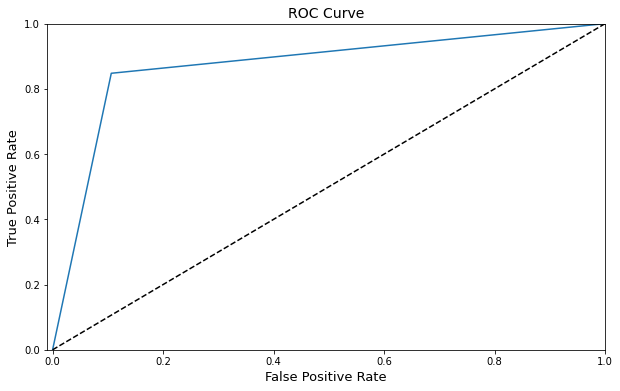

In [40]:
ld_oversampled_fpr, ld_oversampled_tpr, ld_oversampled_thresold = roc_curve(y_test_oversampled, ld_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(ld_oversampled_fpr, ld_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, ld_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)




ld_oversampled_fpr, ld_oversampled_tpr, ld_oversampled_thresold = roc_curve(y_test, ld_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(ld_oversampled_fpr, ld_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, ld_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

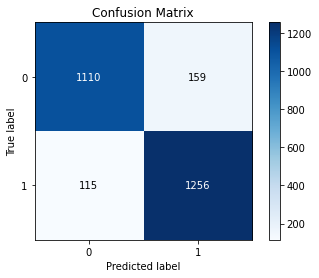

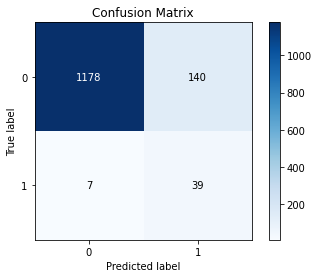

In [41]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, ld_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_test, ld_oversampled_pred_class_original)

#XGBoost oversampled

In [42]:
xgb_oversampled = XGBClassifier()

xgb_oversampled.fit(x_train_oversampled,y_train_oversampled)
xgb_oversampled_pred_class = xgb_oversampled.predict(x_test_oversampled)
xgb_oversampled_pred_class_original = xgb_oversampled.predict(x_test)

print(classification_report(y_test_oversampled, xgb_oversampled_pred_class))
print(classification_report(y_test, xgb_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1269
           1       0.95      0.99      0.97      1371

    accuracy                           0.97      2640
   macro avg       0.97      0.97      0.97      2640
weighted avg       0.97      0.97      0.97      2640

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1318
           1       0.46      0.93      0.62        46

    accuracy                           0.96      1364
   macro avg       0.73      0.95      0.80      1364
weighted avg       0.98      0.96      0.97      1364



Text(0, 0.5, 'True Positive Rate')

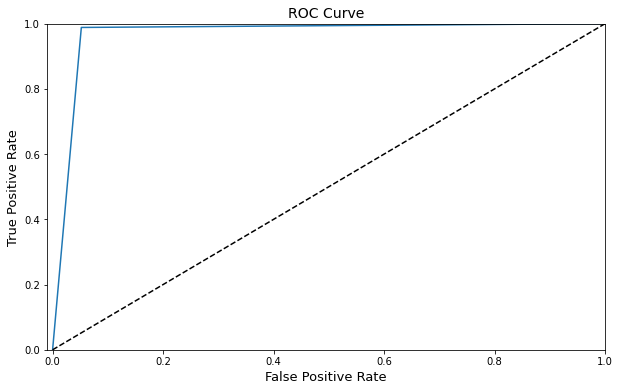

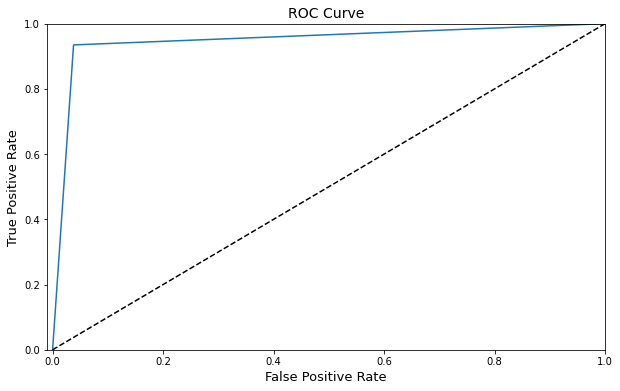

In [43]:
xgb_oversampled_fpr, xgb_oversampled_tpr, xgb_oversampled_thresold = roc_curve(y_test_oversampled, xgb_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(xgb_oversampled_fpr, xgb_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, xgb_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)




xgb_oversampled_fpr, xgb_oversampled_tpr, xgb_oversampled_thresold = roc_curve(y_test, xgb_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(xgb_oversampled_fpr, xgb_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, xgb_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

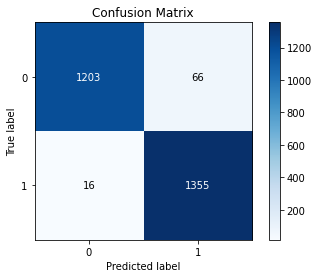

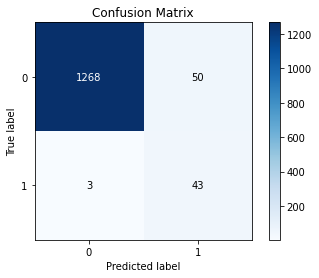

In [44]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, xgb_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_test, xgb_oversampled_pred_class_original)

#SVM oversampled

In [45]:
svc_oversampled = SVC(kernel = 'rbf')

svc_oversampled.fit(x_train_oversampled,y_train_oversampled)
svc_oversampled_pred_class = svc_oversampled.predict(x_test_oversampled)
svc_oversampled_pred_class_original = svc_oversampled.predict(x_test)

print(classification_report(y_test_oversampled, svc_oversampled_pred_class))
print(classification_report(y_test, svc_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1269
           1       0.81      0.88      0.85      1371

    accuracy                           0.83      2640
   macro avg       0.84      0.83      0.83      2640
weighted avg       0.84      0.83      0.83      2640

              precision    recall  f1-score   support

           0       0.99      0.80      0.88      1318
           1       0.12      0.80      0.21        46

    accuracy                           0.80      1364
   macro avg       0.56      0.80      0.55      1364
weighted avg       0.96      0.80      0.86      1364



Text(0, 0.5, 'True Positive Rate')

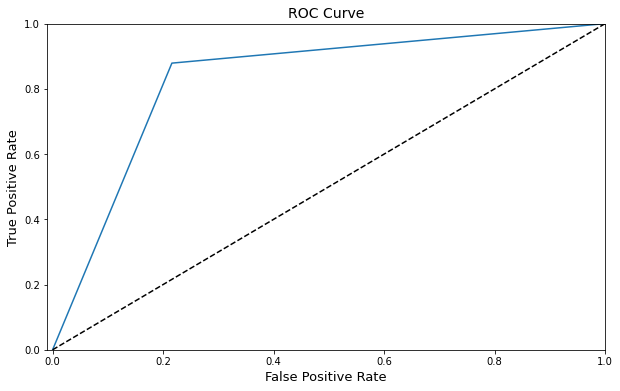

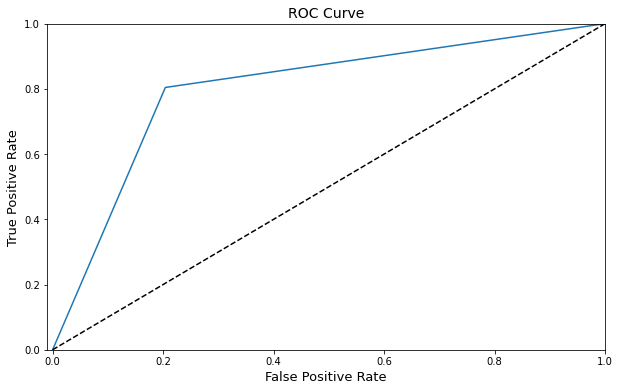

In [46]:
svc_oversampled_fpr, svc_oversampled_tpr, svc_oversampled_thresold = roc_curve(y_test_oversampled, svc_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(svc_oversampled_fpr, svc_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, svc_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)




svc_oversampled_fpr, svc_oversampled_tpr, svc_oversampled_thresold = roc_curve(y_test, svc_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(svc_oversampled_fpr, svc_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

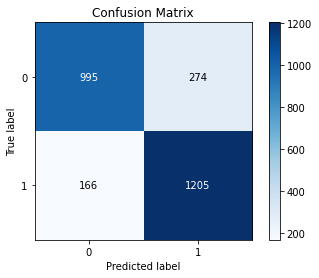

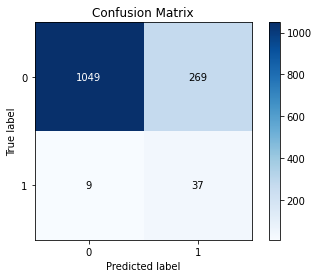

In [47]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, svc_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_test, svc_oversampled_pred_class_original)

#Random Forest oversampled

In [48]:
rf_oversampled = RandomForestClassifier()

rf_oversampled.fit(x_train_oversampled,y_train_oversampled)
rf_oversampled_pred_class = rf_oversampled.predict(x_test_oversampled)
rf_oversampled_pred_class_original = rf_oversampled.predict(x_test)

print(classification_report(y_test_oversampled, rf_oversampled_pred_class))
print(classification_report(y_test, rf_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1269
           1       0.97      1.00      0.98      1371

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1318
           1       0.92      0.98      0.95        46

    accuracy                           1.00      1364
   macro avg       0.96      0.99      0.97      1364
weighted avg       1.00      1.00      1.00      1364



Text(0, 0.5, 'True Positive Rate')

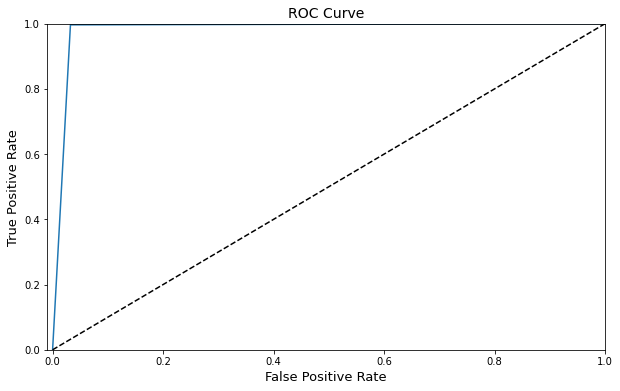

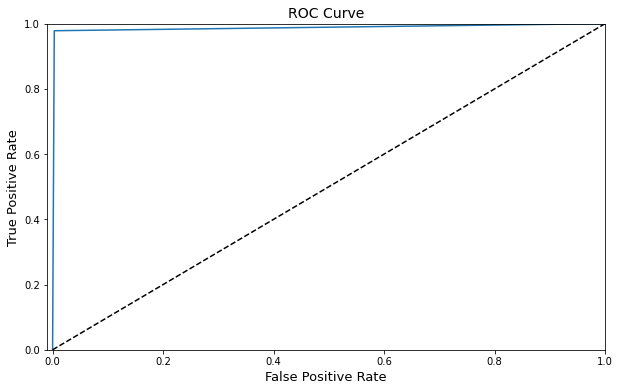

In [49]:
rf_oversampled_fpr, rf_oversampled_tpr, rf_oversampled_thresold = roc_curve(y_test_oversampled, rf_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(rf_oversampled_fpr, rf_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, rf_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)




rf_oversampled_fpr, rf_oversampled_tpr, rf_oversampled_thresold = roc_curve(y_test, rf_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(rf_oversampled_fpr, rf_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, rf_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

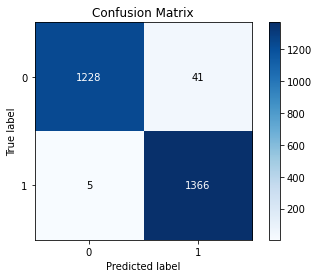

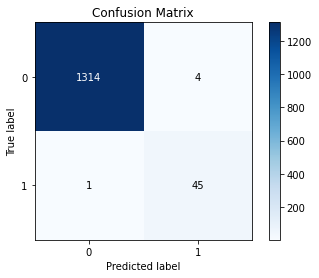

In [50]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, rf_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_test, rf_oversampled_pred_class_original)

#KNN oversampled

In [51]:
knn_oversampled = KNeighborsClassifier(n_neighbors = 5)

knn_oversampled.fit(x_train_oversampled,y_train_oversampled)
knn_oversampled_pred_class = knn_oversampled.predict(x_test_oversampled)
knn_oversampled_pred_class_original = knn_oversampled.predict(x_test)

print(classification_report(y_test_oversampled, knn_oversampled_pred_class))
print(classification_report(y_test, knn_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1269
           1       0.89      0.99      0.93      1371

    accuracy                           0.93      2640
   macro avg       0.93      0.92      0.93      2640
weighted avg       0.93      0.93      0.93      2640

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      1318
           1       0.23      1.00      0.37        46

    accuracy                           0.89      1364
   macro avg       0.61      0.94      0.65      1364
weighted avg       0.97      0.89      0.92      1364



Text(0, 0.5, 'True Positive Rate')

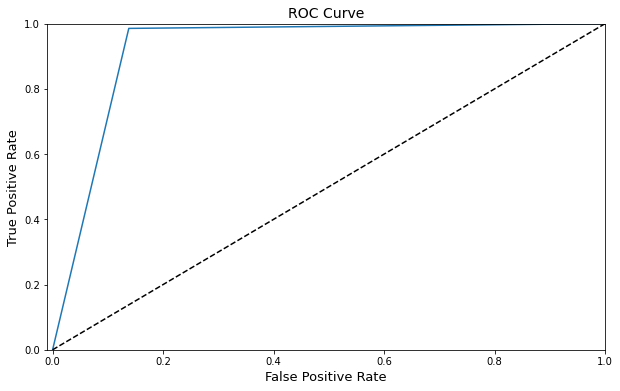

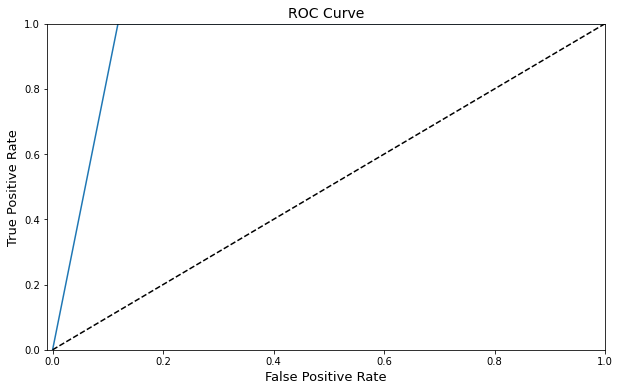

In [52]:
knn_oversampled_fpr, knn_oversampled_tpr, knn_oversampled_thresold = roc_curve(y_test_oversampled, knn_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(knn_oversampled_fpr, knn_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, knn_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)




knn_oversampled_fpr, knn_oversampled_tpr, knn_oversampled_thresold = roc_curve(y_test, knn_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(knn_oversampled_fpr, knn_oversampled_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knn_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

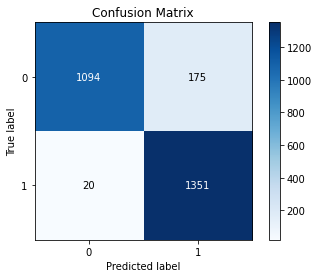

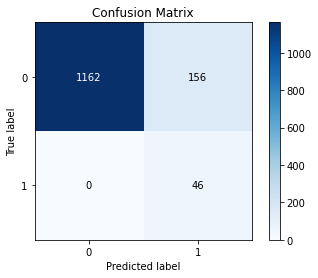

In [53]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, knn_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_test, knn_oversampled_pred_class_original)

#Neural Network oversampled

In [54]:
mlp_oversampled = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20,20), random_state=1)
mlp_oversampled.fit(x_train_oversampled, y_train_oversampled)

mlp_oversampled.fit(x_train_oversampled, y_train_oversampled)
mlp_oversampled_pred_class = mlp_oversampled.predict(x_test_oversampled)
mlp_oversampled_pred_class_original = mlp_oversampled.predict(x_test)

print(classification_report(y_test_oversampled, mlp_oversampled_pred_class))
print(classification_report(y_test, mlp_oversampled_pred_class_original))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74      1269
           1       0.75      0.82      0.78      1371

    accuracy                           0.76      2640
   macro avg       0.76      0.76      0.76      2640
weighted avg       0.76      0.76      0.76      2640

              precision    recall  f1-score   support

           0       0.99      0.72      0.83      1318
           1       0.10      0.89      0.18        46

    accuracy                           0.72      1364
   macro avg       0.55      0.80      0.51      1364
weighted avg       0.96      0.72      0.81      1364



Text(0, 0.5, 'True Positive Rate')

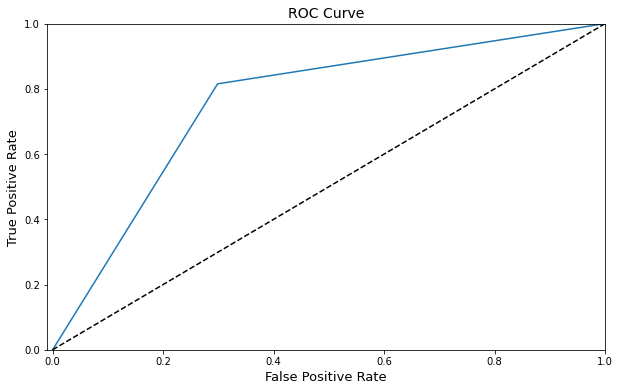

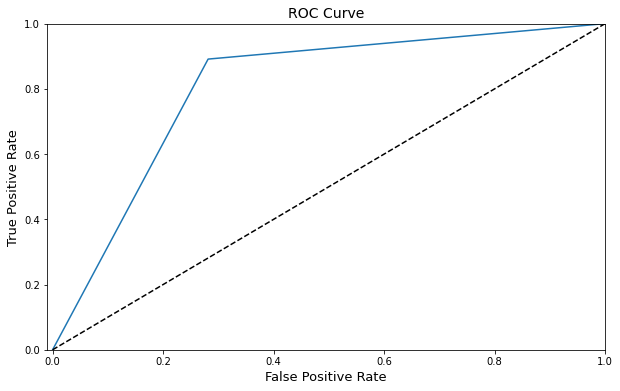

In [55]:
mlp_oversampled_fpr, mlp_oversampled_tpr, mlp_oversampled_thresold = roc_curve(y_test_oversampled, mlp_oversampled_pred_class)

plt.figure(figsize=(10,6))
plt.plot(mlp_oversampled_fpr, mlp_oversampled_tpr, label='mlp_oversampled Classifier Score: {:.4f}'.format(roc_auc_score(y_test_oversampled, mlp_oversampled_pred_class)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)




mlp_oversampled_fpr, mlp_oversampled_tpr, mlp_oversampled_thresold = roc_curve(y_test, mlp_oversampled_pred_class_original)

plt.figure(figsize=(10,6))
plt.plot(mlp_oversampled_fpr, mlp_oversampled_tpr, label='mlp_oversampled Classifier Score: {:.4f}'.format(roc_auc_score(y_test, mlp_oversampled_pred_class_original)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)

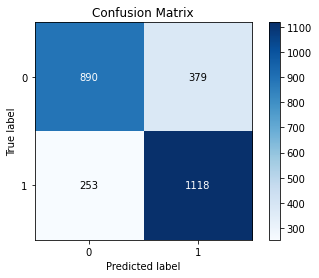

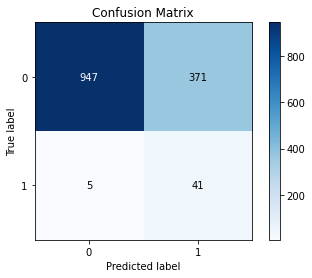

In [56]:
plot = skplt.metrics.plot_confusion_matrix(y_test_oversampled, mlp_oversampled_pred_class)
plot = skplt.metrics.plot_confusion_matrix(y_test, mlp_oversampled_pred_class_original)


#Balancing data: Undersampling with Tomek Links (descontinuado por não ser útil)

In [57]:
undersample = TomekLinks(sampling_strategy='majority')
x_undersampled, y_undersampled = undersample.fit_resample(x, y)
x_train_undersampled, x_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(x_undersampled, y_undersampled, test_size = 0.2, random_state = 0)

print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_undersampled))

Original dataset shape Counter({0: 6599, 1: 220})
Resampled dataset shape Counter({0: 6508, 1: 220})


#Hyperparamter tuning with sherpa + SMOTE

In [58]:
!pip install parameter-sherpa
import sherpa
import sherpa.algorithms.bayesian_optimization as bayesian_optimization

In [59]:
#example
#parameters = [sherpa.Discrete('n_neighbors', [3, 15]),,
#              sherpa.Choice('algorithm', ['gini', 'entropy']),
#              sherpa.Continuous('max_features', [0.1, 0.9])]
#
#algorithm = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [60]:
parameters = [sherpa.Discrete('n_neighbors', [3, 15]),
              sherpa.Discrete('leaf_size', [20, 50]),
              sherpa.Choice('algorithm', ['ball_tree', 'kd_tree', 'brute'])]

algorithm = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=10)

In [61]:
#study = sherpa.Study(parameters=parameters,
#                     algorithm=algorithm,
#                     lower_is_better=False)
#
#for trial in study:
#    print("Trial ", trial.id, " with parameters ", trial.parameters)
#    knn = KNeighborsClassifier(n_neighbors=trial.parameters['n_neighbors'],
#                                 leaf_size=trial.parameters['leaf_size'],
#                                 algorithm=trial.parameters['algorithm'])
#    knn.fit(x_train, y_train)
#    knn_pred_class = knn.predict(x_test)
#
#    knn_f1 = f1_score(y_test, knn_pred_class)
#
#    print("F1 score: ", knn_f1)
#    study.add_observation(trial, iteration=1, objective=knn_f1)
#    study.finalize(trial)
#print(study.get_best_result())


